# Inverse kinematics of a wrist joint

In [1]:
import numpy as np
import doctest

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Orienting the wrist joint

Many manipulator-type robots have a wrist joint of two or three degrees of freedom
<img src="https://d3i71xaburhd42.cloudfront.net/2757cbd3cb66d5326e20ffece70071f2f4174f50/5-Figure2-1.png" width=512/>

Note that the axes of rotation intersect in one point. This is called the wrist center.

The inverse kinematics procedure can then first find the joint angles of the joints from base via the first links of the arm to the wrist so that the wrist center is at the desired position, and then the orientation of the tool/end effector is obtained by the three wrist joints. 

The underarm link is assumed to be fixed, and has reference frame $\{x_0, y_0, z_0\}$
with origin in the wrist center. The tool frame is aligned with the hand frame $\{x_2, y_2, z_2\}$ and in the default configuration (all joint angles equal to zero) this frame coincides with the reference frame of the underarm $\{x_0, y_0, z_0\}$.

The first degree of freedom is the wrist rotation about $z_0$. The second degree of 
freedom is the wrist pitch given by the rotation about $z_1$, which in the reference configuration coincides with $y_0$. The final degree of freedom is a rotation about $z_2$. In the default configuration $z_2$ is aligned with $z_0$.

In this exercise, we focus on determining the joint angles of the wrist degrees of freedom.

In [6]:
def fk_wrist(th):
    '''
    The explanation of the kinematics refer to the image above. 
    
    Argument
    --------
    th : array-like (3,)
       The three joint angles of the wrist
    
    Returns
    -------
    R : ndarray (3x3)
       The rotation matrix
       
    Tests
    -----
    
    1) 
    Identity matrix
    >>> R = fk_wrist([0,0,0])
    >>> np.allclose(R, np.eye(3))
    True
    
    2)
    Composition correct
    >>> R1 = fk_wrist([1,1,1])
    >>> R2 = fk_wrist([0,0,-1])
    >>> R3 = fk_wrist([1,1, 0])
    >>> np.allclose(np.dot(R1,R2), R3)
    True
    '''

    def rodrigues(w, th):
        what = np.array([[0,-w[2], w[1]], 
                     [w[2], 0, -w[0]],
                    [-w[1], w[0], 0]], dtype=np.float64)
        return (np.eye(3) + np.sin(th)*what + (1-np.cos(th))*np.dot(what, what))    
    
    Rz1 = rodrigues([0,0,1], th[0])
    Ry = rodrigues([0,1,0], th[1])
    Rz2 = rodrigues([0,0,1], th[2])
    
    return np.dot(Rz1, np.dot(Ry, Rz2))    

In [7]:
doctest.run_docstring_examples(fk_wrist, globals())

In [21]:
def ik_wrist(R):
    '''
    Solves the inverse kinematics problem for a spherical wrist joint. 
    The explanation of the kinematics refer to the image above. 
    The underarm link is assumed to be fixed, and has reference frame $\{x_0, y_0, z_0\}$
    with origin in the wrist center.
    The tool frame is aligned with the hand frame $\{x_2, y_2, z_2\}$ and in the default 
    configuration (all joint angles equal to zero) this frame coincides with the reference
    frame of the underarm $\{x_0, y_0, z_0\}$.
    The first degree of freedom is the wrist rotation about $z_0$. The second degree of 
    freedom is the wrist pitch given by the rotation about $z_1$, and the final 
    degree of freedom is a rotation about $z_2$. In the default configuration $z_1$ is aligned 
    with $x_0$.
        
    Arguments
    ---------
    R : numpy array (3x3)
       The desired rotation matrix that describes the orientation of the tool frame
       with respect to the underarm reference frame. It is the rotation matrix that when
       operating on vectors given in the tool-frame gives the orientation of these
       vectors in the underarm frame.
       
    Returns
    -------
    (q_1, q_2, q_3) : tuple of floats
       The three joint angles in radians.
       
    Tests
    -----
    
    1) 
    An identity matrix
    >>> R = np.eye(3)
    >>> q1, q2, q3 = ik_wrist(R)
    >>> "(%0.2f, %0.2f, %0.2f)" %(np.abs(q1), np.abs(q2), np.abs(q3))
    '(0.00, 0.00, 0.00)'
    
    2) 
    Rotation about second joint
    >>> th2 = np.pi/4
    >>> c2 = np.cos(th2)
    >>> s2 = np.sin(th2)
    >>> R = np.eye(3)
    >>> R[0,0] = c2
    >>> R[0,2] = s2
    >>> R[2,2] = c2
    >>> R[2,0] = -s2
    >>> np.allclose(ik_wrist(R), [0, th2, 0] )
    True
    
    3) 
    Making use of the forward kinematic, test 4 random orientations.
    >>> for i in range(4):
    ...    qs = np.pi/2*np.random.rand(3)
    ...    R = fk_wrist(qs)
    ...    np.allclose(qs, ik_wrist(R)) 
    True
    True
    True
    True
    '''
    
    # Using the result from the symbolic calculations below
    if np.abs(R[2,2]-1.0) < 1e-10:
        # Singularity, since second rotation is 0 and the first and second
        # axes coincide. Assume all rotation is in the last degree of freedom
        th1 = 0
        th2 = 0
        th3 = np.arctan(-R[1,0]/R[0,0])
    else:
        th2 = 0
        th1 = 0
        th3 = 0
        
    return (th1, th2, th3)

In [22]:
doctest.run_docstring_examples(ik_wrist, globals(), verbose=True)

Finding tests in NoName
Trying:
    R = np.eye(3)
Expecting nothing
ok
Trying:
    q1, q2, q3 = ik_wrist(R)
Expecting nothing
ok
Trying:
    "(%0.2f, %0.2f, %0.2f)" %(np.abs(q1), np.abs(q2), np.abs(q3))
Expecting:
    '(0.00, 0.00, 0.00)'
ok
Trying:
    th2 = np.pi/4
Expecting nothing
ok
Trying:
    c2 = np.cos(th2)
Expecting nothing
ok
Trying:
    s2 = np.sin(th2)
Expecting nothing
ok
Trying:
    R = np.eye(3)
Expecting nothing
ok
Trying:
    R[0,0] = c2
Expecting nothing
ok
Trying:
    R[0,2] = s2
Expecting nothing
ok
Trying:
    R[2,2] = c2
Expecting nothing
ok
Trying:
    R[2,0] = -s2
Expecting nothing
ok
Trying:
    np.allclose(ik_wrist(R), [0, th2, 0] )
Expecting:
    True
ok
Trying:
    for i in range(4):
       qs = np.pi/2*np.random.rand(3)
       R = fk_wrist(qs)
       np.allclose(qs, ik_wrist(R)) 
Expecting:
    True
    True
    True
    True
ok


## Symbolic description for rotation matrix of the wrist

In [4]:
import sympy as sy
sy.init_printing()

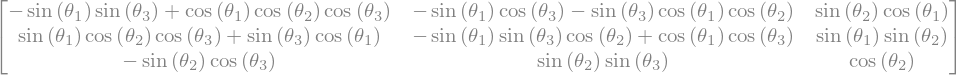

In [5]:
th1, th2, th3 = sy.symbols('theta_1, theta_2, theta_3')

R1z = sy.Matrix([[sy.cos(th1), -sy.sin(th1), 0], 
               [sy.sin(th1), sy.cos(th1), 0],
               [0,0,1]])
R2y = sy.Matrix([[sy.cos(th2), 0, sy.sin(th2)],
                 [0, 1, 0],
                 [-sy.sin(th2), 0, sy.cos(th2)]])
R3z = sy.Matrix([[sy.cos(th3), -sy.sin(th3), 0], 
               [sy.sin(th3), sy.cos(th3), 0],
               [0,0,1]])

R = R1z*R2y*R3z
R